# VC07 - Métodos de aprendizaje semi-supervisado



En esta práctica vamos a ver dos ejemplos: el primero, cómo funciona Naive Bayes con datos sin etiquetar, y el segundo, cómo podemos mejorar la versión básica del Naive Bayes aprendiendo un mejor modelo iterativamente mediante el algoritmo de EM.

## Naive Bayes SIN datos sin etiquetar

Realizamos los imports necesarios:

In [15]:
# Import packages and libraries
import numpy as np
import random as rnd

from scipy.sparse import csr_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

Cargamos nuestros datos:

In [16]:
# Load train and test data set with class labels 
train_Xy = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_Xy = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

Utilizamos la transformación tf-Idf para convertir las palabras a una matriz de números:

In [17]:
# Convert all text data into tf-idf vectors
vectorizer = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.9)
train_vec = vectorizer.fit_transform(train_Xy.data)
test_vec = vectorizer.transform(test_Xy.data)

In [21]:
test_vec.shape

(7532, 26747)

Dividimos los datos entre etiquetados y no etiquetados:

In [18]:
# Divide train data set into labeled and unlabeled data sets
n_train_data = train_vec.shape[0]
split_ratio = 0.2 # labeled vs unlabeled
X_l, X_u, y_l, y_u = train_test_split(train_vec, train_Xy.target, train_size=split_ratio, random_state=42)
print(f'Número de instancias CON etiquetas: {X_l.shape}')
print(f'Número de instancias SIN etiquetas: {X_u.shape}')

Número de instancias CON etiquetas: (2262, 26747)
Número de instancias SIN etiquetas: (9052, 26747)


Entrenamos nuestro BN con únicamente los datos etiquetados:

In [19]:
nb_clf = MultinomialNB(alpha=1e-8)
nb_clf.fit(X_l, y_l)

MultinomialNB(alpha=1e-08)

Y evaluamos su comportamiento:

In [20]:
# Evaluamos comportamiento NB
pred_nb = nb_clf.predict(test_vec)
print(metrics.classification_report(test_Xy.target, pred_nb, target_names=test_Xy.target_names))
print(f'Accuracy score={metrics.accuracy_score(test_Xy.target, pred_nb)}')

                          precision    recall  f1-score   support

             alt.atheism       0.56      0.13      0.21       319
           comp.graphics       0.54      0.32      0.40       389
 comp.os.ms-windows.misc       0.48      0.37      0.42       394
comp.sys.ibm.pc.hardware       0.61      0.42      0.49       392
   comp.sys.mac.hardware       0.65      0.43      0.51       385
          comp.windows.x       0.43      0.76      0.55       395
            misc.forsale       0.56      0.65      0.60       390
               rec.autos       0.73      0.42      0.53       396
         rec.motorcycles       0.80      0.41      0.55       398
      rec.sport.baseball       0.52      0.69      0.59       397
        rec.sport.hockey       0.78      0.85      0.81       399
               sci.crypt       0.59      0.67      0.63       396
         sci.electronics       0.59      0.20      0.30       393
                 sci.med       0.67      0.61      0.64       396
         

Text(0.5, 1.0, 'Matriz de Confusion')

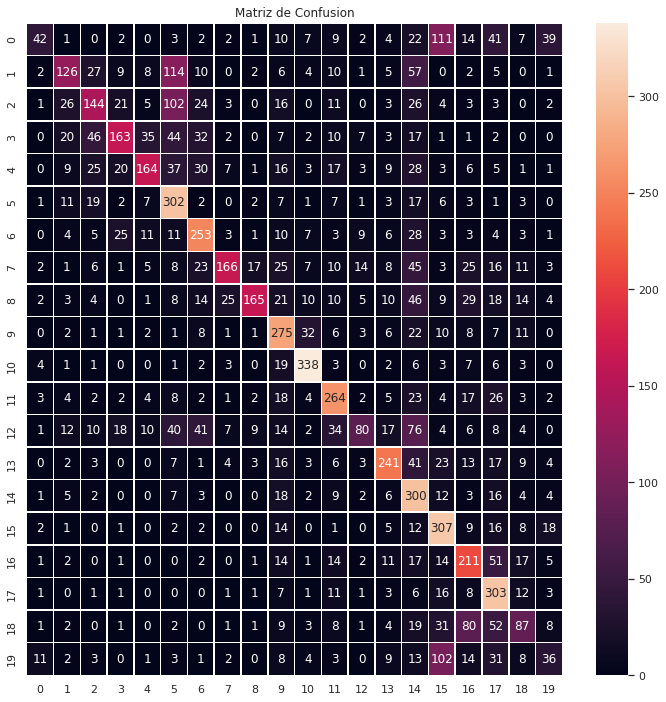

In [22]:
# Matriz de confusión
plt.figure(figsize=(12,12))
sns.set()
sns.heatmap(metrics.confusion_matrix(test_Xy.target, pred_nb), annot=True, fmt="d", linewidths=.5)
plt.title("Matriz de Confusion")

## EM con NaiveBayes

Nos descargamos la clase que implementa el algoritmo de EM:

In [23]:
!wget https://raw.githubusercontent.com/jerry-shijieli/Text_Classification_Using_EM_And_Semisupervied_Learning/master/code/Semi_EM_NB.py

--2022-04-12 19:39:54--  https://raw.githubusercontent.com/jerry-shijieli/Text_Classification_Using_EM_And_Semisupervied_Learning/master/code/Semi_EM_NB.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13414 (13K) [text/plain]
Saving to: ‘Semi_EM_NB.py.1’

Semi_EM_NB.py.1     100%[===================>]  13.10K  --.-KB/s    in 0s      

2022-04-12 19:39:54 (78.2 MB/s) - ‘Semi_EM_NB.py.1’ saved [13414/13414]



La importamos:

In [24]:
from Semi_EM_NB import Semi_EM_MultinomialNB

Entrenamos nuestro NB con EM usando los datos etiquetados y los no etiquetados:

In [30]:
X_l.shape

(2262, 26747)

In [31]:
X_u.shape

(9052, 26747)

In [33]:
test_Xy.target.shape

(7532,)

In [25]:
em_nb_clf = Semi_EM_MultinomialNB(alpha=1e-2)
em_nb_clf.fit(X_l, y_l, X_u)

Initial expected log likelihood = -4899596.337

EM iteration #1
	Expected log likelihood = -4536425.841
EM iteration #2
	Expected log likelihood = -4535638.655
EM iteration #3
	Expected log likelihood = -4535553.577
EM iteration #4
	Expected log likelihood = -4535553.577


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


Y lo evaluamos:

In [26]:
# Evaluamos su comportamiento
pred_em_nb = em_nb_clf.predict(test_vec)
print(metrics.classification_report(test_Xy.target, pred_em_nb, target_names=test_Xy.target_names))
print(f'Accuracy score={metrics.accuracy_score(test_Xy.target, pred_em_nb)}')

                          precision    recall  f1-score   support

             alt.atheism       0.70      0.17      0.27       319
           comp.graphics       0.60      0.61      0.61       389
 comp.os.ms-windows.misc       0.62      0.47      0.54       394
comp.sys.ibm.pc.hardware       0.59      0.64      0.61       392
   comp.sys.mac.hardware       0.66      0.60      0.63       385
          comp.windows.x       0.66      0.77      0.71       395
            misc.forsale       0.69      0.72      0.70       390
               rec.autos       0.75      0.66      0.70       396
         rec.motorcycles       0.75      0.62      0.68       398
      rec.sport.baseball       0.55      0.86      0.67       397
        rec.sport.hockey       0.92      0.88      0.90       399
               sci.crypt       0.71      0.74      0.72       396
         sci.electronics       0.75      0.41      0.53       393
                 sci.med       0.87      0.73      0.80       396
         

Text(0.5, 1.0, 'Matriz de Confusion')

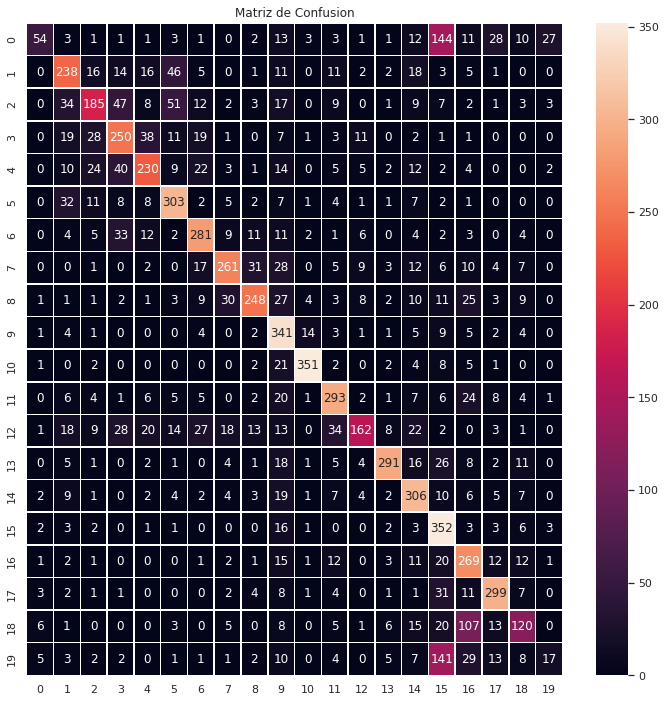

In [27]:
# plot confusion matrix for test dataset
plt.figure(figsize=(12,12))
sns.set()
sns.heatmap(metrics.confusion_matrix(test_Xy.target, pred_em_nb), annot=True, fmt="d", linewidths=.5)
plt.title("Matriz de Confusion")

Veamos las distribuciones aprendidas:

In [28]:
print('NB: ', nb_clf.class_log_prior_)
print('EM NB: ', em_nb_clf.clf.class_log_prior_)

NB:  [-3.2813534  -2.97907253 -2.87197439 -3.06056556 -2.98780621 -2.86419225
 -2.83365553 -3.09903184 -3.04187343 -2.78953072 -2.83365553 -2.93651291
 -3.07004431 -2.94488116 -3.00550579 -2.96183072 -3.09903184 -2.9118203
 -3.26965736 -3.26965736]
EM NB:  [-3.55924463 -3.02752089 -3.02206137 -3.01663149 -2.9724937  -2.76994065
 -2.84307264 -3.14348077 -3.08382093 -2.61116638 -2.92526738 -2.86920787
 -3.26537059 -2.99874192 -2.93187898 -2.63429584 -2.91054921 -2.95028954
 -3.32498299 -3.69900657]


Y para ver de una forma más visual la mejora que ha habido, veamos la diferencia entre las matrices de confusión:

Text(0.5, 1.0, 'Diferencias entre NB y EM NB')

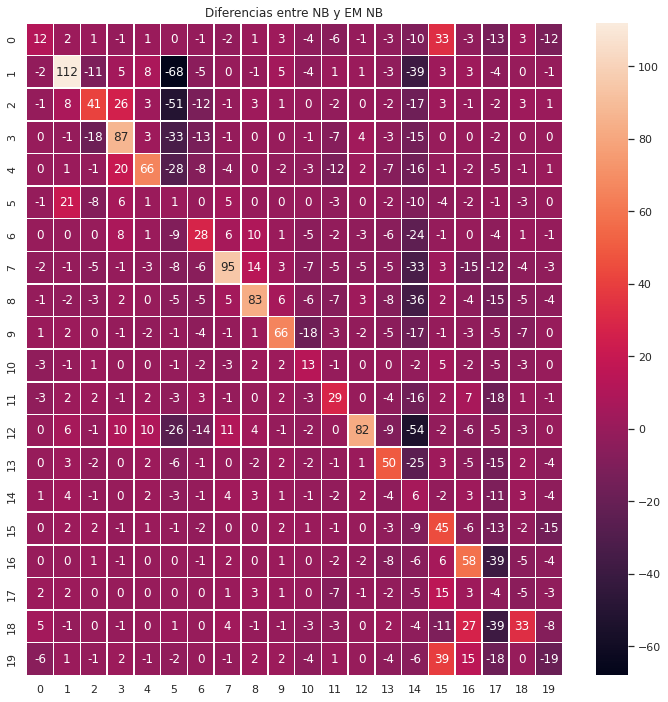

In [29]:
# plot diferencias entre las matrices de confusion
plt.figure(figsize=(12,12))
sns.set()
sns.heatmap(metrics.confusion_matrix(test_Xy.target, pred_em_nb) - metrics.confusion_matrix(test_Xy.target, pred_nb), annot=True, fmt="d", linewidths=.5)
plt.title("Diferencias entre NB y EM NB")

FUENTE: https://github.com/jerry-shijieli/Text_Classification_Using_EM_And_Semisupervied_Learning/

- Explicaciones de NB bastante didácticas y útiles: 
   - https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf
   - https://medium.com/@srishtisawla/introduction-to-naive-bayes-for-classification-baefefb43a2d
- Uso de NB para sentiment analysis con código y muy didáctico: https://levelup.gitconnected.com/movie-review-sentiment-analysis-with-naive-bayes-machine-learning-from-scratch-part-v-7bb869391bab